In [1]:
from tcsim.system import*
from tcsim.visualization import*
from tcsim.gates import*
from scipy import optimize
from qutip import*

In [70]:
import numpy as np
# note that thse functions are not properly normalized yet..
def char_func_cat(xy_tuple, amplitude, sigma_x,sigma_y, beta_amp, theta, offset):
    theta = theta+np.pi/2
    (x,y) = xy_tuple
    alpha = x+1j*y
    
    beta = beta_amp*np.exp(-1j*theta)
    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2) 
    
    g = offset + amplitude*np.exp( - (a*((x)**2) + 2*b*(x)*(y) 
                            + c*((y)**2)))*np.real(np.exp(np.conjugate(alpha)*beta-np.conjugate(beta)*alpha)) + 0.5*(np.exp(-np.abs((np.sqrt(2)*beta + alpha/(np.sqrt(2)))**2)) + np.exp(-np.abs((np.sqrt(2)*beta - alpha/(np.sqrt(2)))**2)))
    return g/np.max(g)


def char_func_cat_fringe(xy_tuple, amplitude, sigma_x,sigma_y, beta_amp, theta, offset):
    theta = theta+np.pi/2
    (x,y) = xy_tuple
    alpha = x+1j*y
    beta = beta_amp*np.exp(-1j*theta)
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2) 
    
    g = offset + amplitude*np.exp( - (a*((x)**2) + 2*b*(x)*(y) 
                            + c*((y)**2)))*np.real(np.exp(np.conjugate(alpha)*beta-np.conjugate(beta)*alpha))
    return g/np.max(g)
    
    
def char_func_cat_blob(xy_tuple, amplitude, sigma_x,sigma_y, beta_amp, theta, offset):
    theta = theta+np.pi/2
    (x,y) = xy_tuple
    alpha = x+1j*y
    
    beta = beta_amp*np.exp(-1j*theta)
    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2) 
    
    g = offset + 0.5*(np.exp(-np.abs((np.sqrt(2)*beta + alpha/(np.sqrt(2)))**2)) + np.exp(-np.abs((np.sqrt(2)*beta - alpha/(np.sqrt(2))))**2))
    return g/np.max(g)

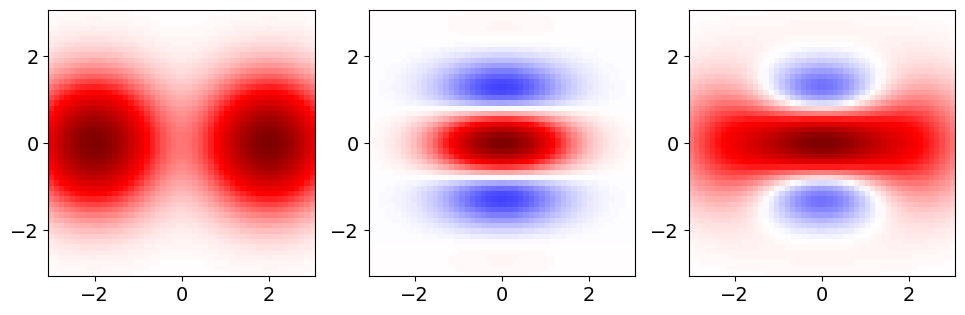

In [69]:
xvec = np.linspace(-3,3,50)
X, Y = np.meshgrid(xvec,xvec)
cat_params = [1, 1, 1, 1j*1, 0 ,0]

blobs = char_func_cat_blob((X,Y), *cat_params)
fringe = char_func_cat_fringe((X,Y), *cat_params)
cat = char_func_cat((X,Y), *cat_params)
fig, ax = plt.subplots(1,3)
ax[0].pcolormesh(X,Y,blobs, vmin = -1, vmax = 1, cmap="seismic")
ax[0].set_aspect("equal")
ax[1].pcolormesh(X,Y,fringe, vmin = -1, vmax = 1, cmap="seismic")
ax[1].set_aspect("equal")
ax[2].pcolormesh(X,Y,cat, vmin = -1, vmax = 1, cmap="seismic")
ax[2].set_aspect("equal")

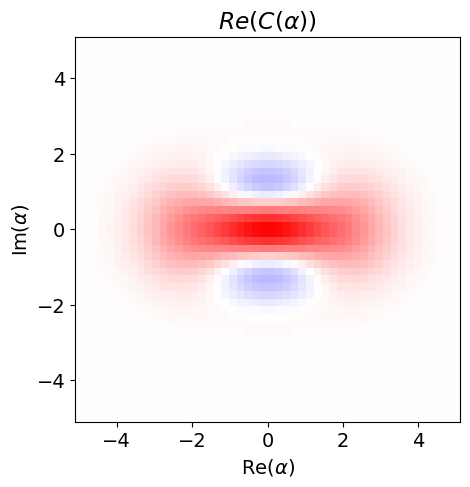

In [52]:
plot_char(tensor(fock(2,0),(coherent(N,1)+coherent(N,-1)).unit()), max_alpha = 5)

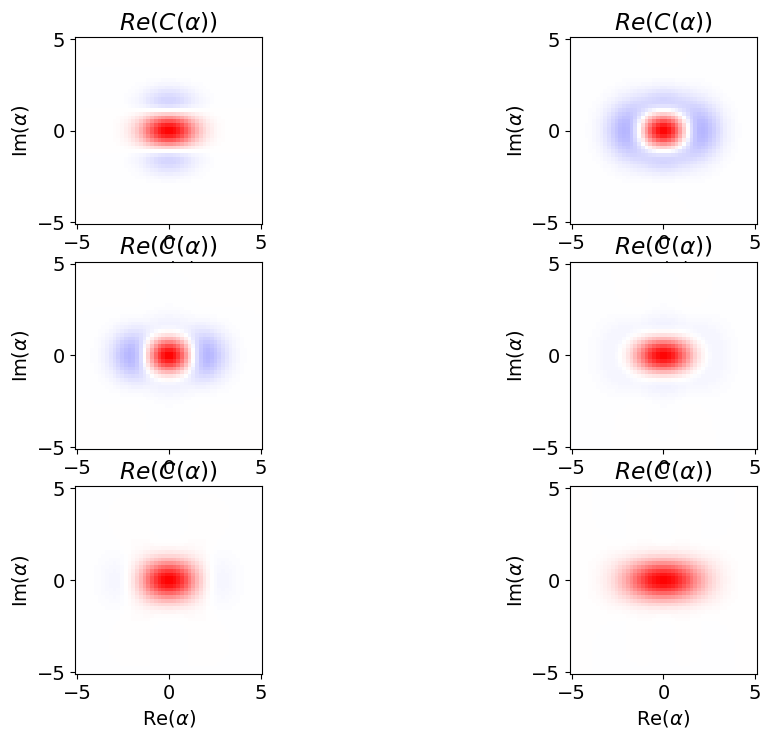

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

In [75]:
uvs = [ 1.38744578,  0.51199234, -0.19874056, -0.46461027, -0.3244084,  -0.65943663]
u_1 = uvs[0]
v_1 =  uvs[1] 
u_2 = uvs[2]
v_2 = uvs[3]
u_3 = uvs[4] 
v_3 = uvs[5]

psi1 = U_ideal_operator(u_1)*vac
psi2 = V_ideal_operator(v_1)*psi1
psi3 = U_ideal_operator(u_2)*psi2
psi4 = V_ideal_operator(v_2)*psi3
psi5 = U_ideal_operator(u_3)*psi4
psi6 = V_ideal_operator(v_3)*psi5


fig, axis = plt.subplots(3,2)
plot_char(psi1,ax = axis[0,0], max_alpha = 5)
plot_char(psi2,ax = axis[0,1], max_alpha = 5)
plot_char(psi3,ax = axis[1,0], max_alpha = 5)
plot_char(psi4,ax = axis[1,1], max_alpha = 5)
plot_char(psi5,ax = axis[2,0], max_alpha = 5)
plot_char(psi6,ax = axis[2,1], max_alpha = 5)




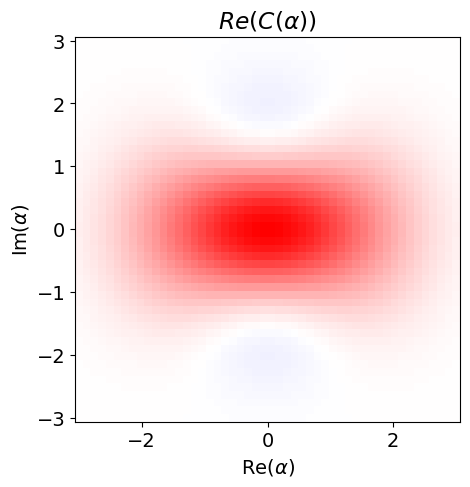

In [2]:
def squeezingStateOneStep(uvs):
    u_1 = uvs[0]
    v_1 = uvs[1]

    psi1 = V_ideal_operator(v_1)*U_ideal_operator(u_1)*vac
 
    return psi1

uv1 = [ 1.0, -0.6]


psi = squeezingStateOneStep(uv1)

plot_char(psi)


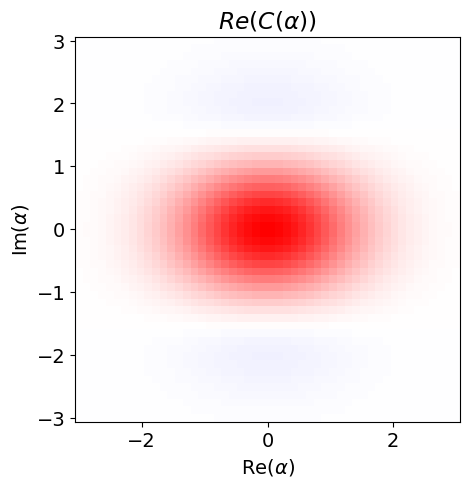

In [7]:
plot_char(tensor(fock(2,0),coherent(N,0.5)))

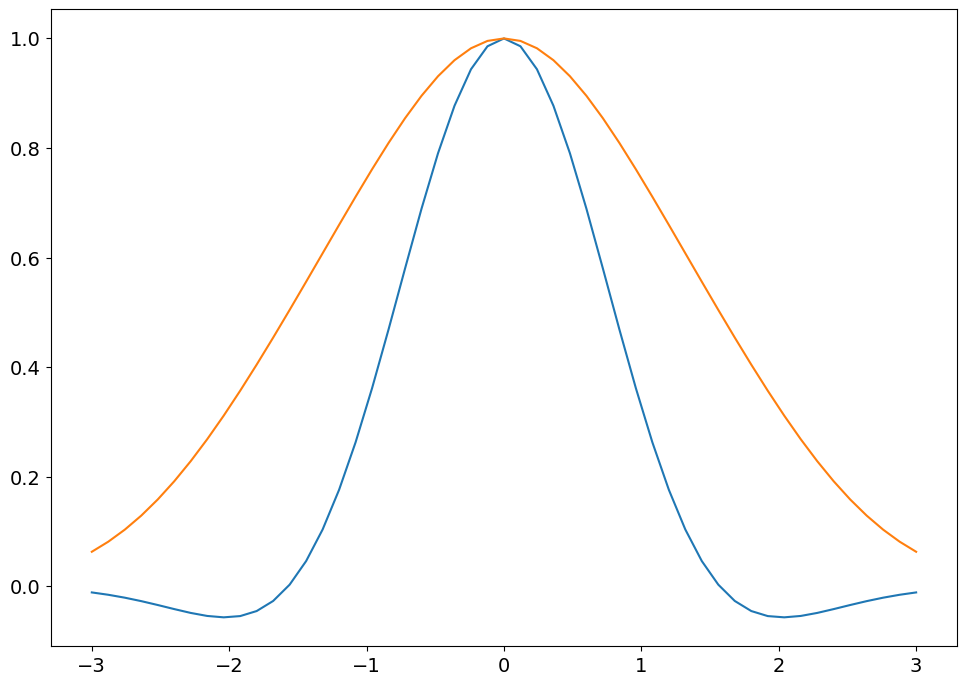

In [5]:
xvec = np.linspace(-3,3,51)
cf_r, cf_im = char_func_grid(psi,xvec)
plt.plot(xvec, cf_r[:,25])
plt.plot(xvec, cf_r[25,:])

In [2]:
from tcsim.visualization import*
from tcsim.gates import*

In [3]:
def plot_wigner(
    state,
    contour=False,
    fig=None,
    ax=None,
    max_alpha=2,
    cbar=False,
    npts=51,
    vmin = -1,
    vmax = 1
):
    
    xvec = np.linspace(-max_alpha, max_alpha, npts)
    W = qt.wigner(qt.ptrace(state,1) ,xvec , xvec, g = 2 )
    if fig is None:
        fig = plt.figure(figsize=(6, 5))
    if ax is None:
        ax = fig.subplots()
    if contour:
        levels = np.linspace(-1.1, 1.1, 102)
        im = ax.contourf(
            xvec, xvec, W, cmap="seismic", vmin=vmin, vmax=vmax, levels=levels,
        )
    else:
        im = ax.pcolormesh(
            xvec, xvec, W, cmap="seismic", vmin=vmin, vmax=vmax
        )
    

    ax.grid()
    # ax.set_title(title)

    fig.tight_layout()
    if cbar:
        fig.subplots_adjust(right=0.8, hspace=0.25, wspace=0.25)
        # todo: ensure colorbar even with plot...
        # todo: fix this colorbar

        cbar_ax = fig.add_axes([0.85, 0.225, 0.025, 0.65])
        ticks = np.linspace(-1, 1, 5)
        fig.colorbar(im, cax=cbar_ax, ticks=ticks)
        cbar_ax.set_title(r"$\frac{\pi}{2} W(\alpha)$", pad=10)
    ax.set_aspect("equal", adjustable="box")

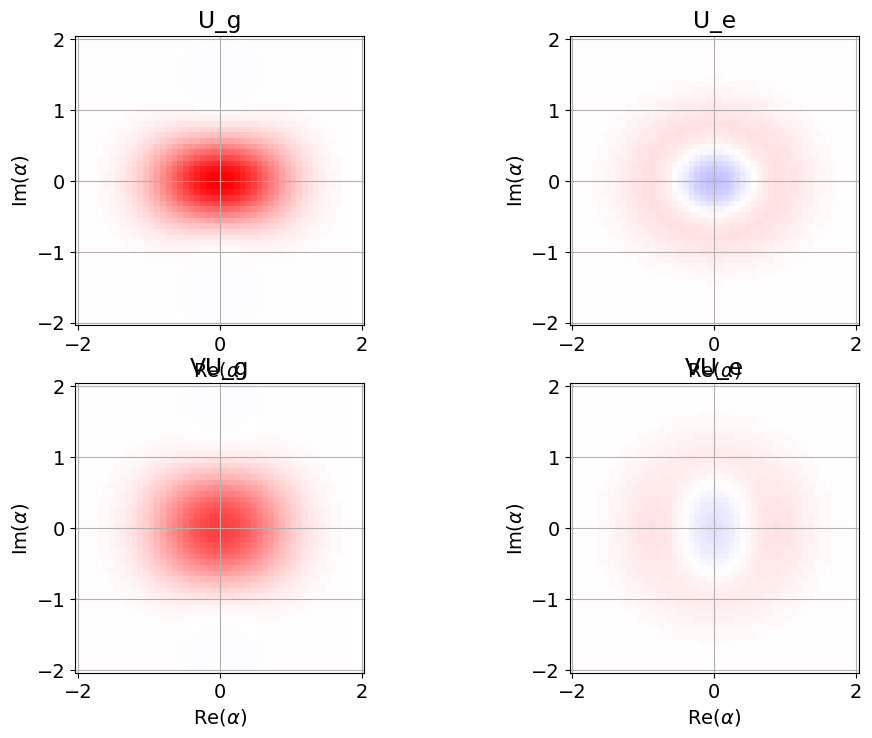

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

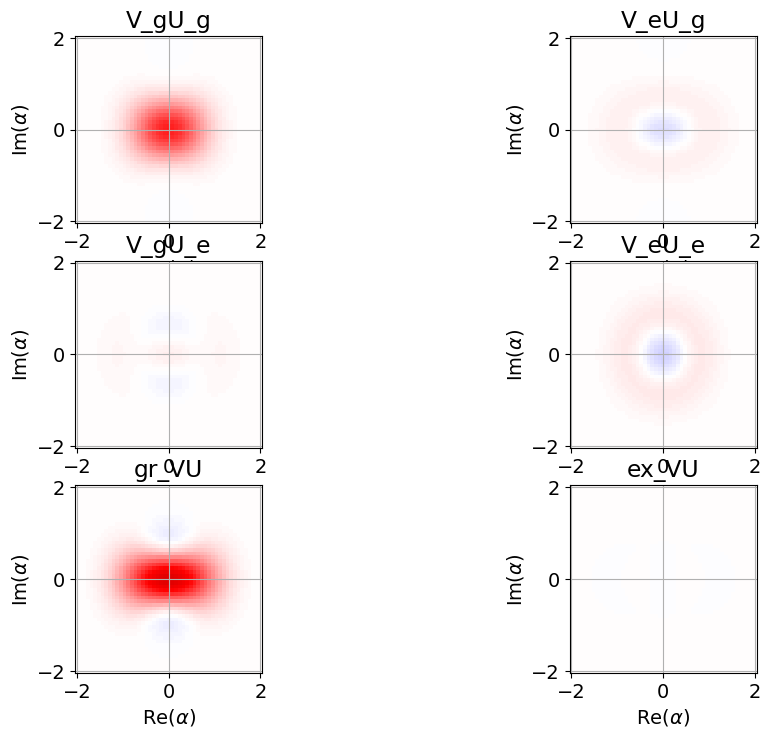

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

In [9]:


xvec = np.linspace(-3,3,50)

U = U_ideal_operator(1)
V = V_ideal_operator(-0.6)


U_state =U*vac

U_g = proj_g*U_state
U_e = proj_e*U_state
VU_g = V*U_g
VU_e = V*U_e

V_gU_g = (proj_g*VU_g)
V_eU_g = (proj_e*VU_g)
V_gU_e = (proj_g*VU_e)
V_eU_e = (proj_e*VU_e)

ground_VU = (proj_g*V*U*vac)
excited_VU = (proj_e*V*U*vac)

fig,axis = plt.subplots(2,2)
axis[0,0].set_title("U_g")
axis[0,1].set_title('U_e')
plot_wigner(U_g, ax= axis[0,0])
plot_wigner(U_e, ax= axis[0,1])

axis[1,0].set_title("VU_g")
axis[1,1].set_title('VU_e')
plot_wigner(VU_g, ax= axis[1,0])
plot_wigner(VU_e, ax= axis[1,1])

fig,axis = plt.subplots(3,2)
axis[0,0].set_title("V_gU_g")
axis[1,0].set_title('V_gU_e')
plot_wigner(V_gU_g, ax= axis[0,0])
plot_wigner(V_gU_e, ax= axis[1,0])

axis[0,1].set_title("V_eU_g")
axis[1,1].set_title('V_eU_e')
plot_wigner(V_eU_g, ax= axis[0,1])
plot_wigner(V_eU_e, ax= axis[1,1])

axis[2,0].set_title("gr_VU")
axis[2,1].set_title('ex_VU')
plot_wigner(ground_VU, ax= axis[2,0])
plot_wigner(excited_VU, ax= axis[2,1])


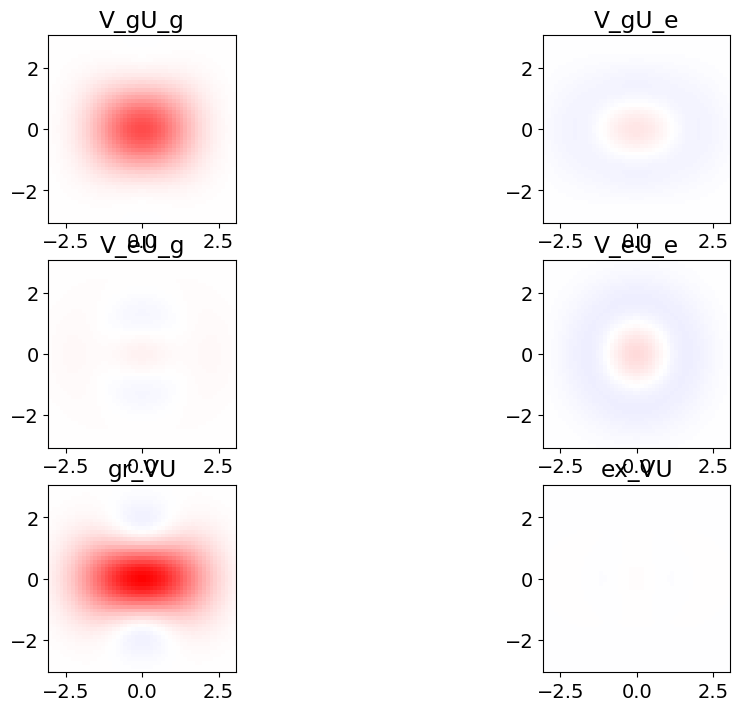

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

In [6]:
fig,axis = plt.subplots(3,2)
axis[0,0].set_title("V_gU_g")
axis[0,1].set_title('V_gU_e')
plot_char(V_gU_g, ax= axis[0,0])
plot_char(V_gU_e, ax= axis[1,0])

axis[1,0].set_title("V_eU_g")
axis[1,1].set_title('V_eU_e')
plot_char(V_eU_g, ax= axis[0,1])
plot_char(V_eU_e, ax= axis[1,1])

axis[2,0].set_title("gr_VU")
axis[2,1].set_title('ex_VU')
plot_char(ground_VU, ax= axis[2,0])
plot_char(excited_VU, ax= axis[2,1])